In [26]:
import pandas as pd
# pd.set_option('max_colwidth', 50)
# set this if you need to
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
killings = pd.read_csv('./data/police-killings.csv')
killings.head()

,Unnamed: 0,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,lawenforcementagency,cause,armed,county_income
0,0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,Millbrook Police Department,Gunshot,No,54766
1,1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,Rapides Parish Sheriff's Office,Gunshot,No,40930
2,2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,Kenosha Police Department,Gunshot,No,54930
3,3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,South Gate Police Department,Gunshot,Firearm,55909
4,4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,Kent Police Department,Gunshot,No,49669


In [7]:
# 1. Make the following changed to column names:
# lawenforcementagency -> agency
# raceethnicity        -> race
killings.rename(columns={'raceethnicity':'race', 'lawenforcementagency':'agency'}, inplace=True)
killings.head()

,Unnamed: 0,name,age,gender,race,month,day,year,streetaddress,city,state,agency,cause,armed,county_income
0,0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,Millbrook Police Department,Gunshot,No,54766
1,1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,Rapides Parish Sheriff's Office,Gunshot,No,40930
2,2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,Kenosha Police Department,Gunshot,No,54930
3,3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,South Gate Police Department,Gunshot,Firearm,55909
4,4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,Kent Police Department,Gunshot,No,49669


In [9]:
# 2. Show the count of missing values in each column
killings.isnull().sum()

Unnamed: 0       0
name             0
age              0
gender           0
race             0
month            0
day              0
year             0
streetaddress    4
city             0
state            0
agency           0
cause            0
armed            0
county_income    0
dtype: int64

In [12]:
# 3. replace each null value in the dataframe with the string "Unknown"
killings = killings.fillna("unknown")

In [13]:
killings.isnull().sum()

Unnamed: 0       0
name             0
age              0
gender           0
race             0
month            0
day              0
year             0
streetaddress    0
city             0
state            0
agency           0
cause            0
armed            0
county_income    0
dtype: int64

In [16]:
# 4. How many killings were there so far in 2015?
len(killings)

467

In [17]:
# 5. Of all killings, how many were male and how many female?
killings.groupby('gender').gender.count()

gender
Female     22
Male      445
Name: gender, dtype: int64

In [19]:
# 6. How many killings were of unarmed people?
len(killings[killings.armed == 'No'])

102

In [23]:
# 7. What percentage of all killings were unarmed?
print(str(float(len(killings[killings.armed == 'No']))/float(len(killings)) * 100) + '%')

21.8415417559%


In [24]:
# 8. What are the 5 states with the most killings?
killings.groupby('state').state.count().head(5).sort_values(ascending=False)

state
CA    74
AZ    25
AL     8
AR     4
AK     2
Name: state, dtype: int64

In [25]:
# 9. Show a value counts of deaths for each race
killings.race.value_counts()

White                     236
Black                     135
Hispanic/Latino            67
Unknown                    15
Asian/Pacific Islander     10
Native American             4
Name: race, dtype: int64

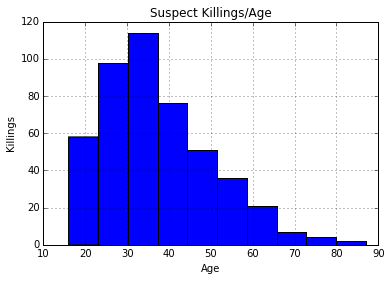

In [30]:
# 10. Display a histogram of ages of all killings
killings.age.hist()
plt.title('Suspect Killings/Age')
plt.xlabel('Age')
plt.ylabel('Killings')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10a59e490>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10b241b50>]], dtype=object)

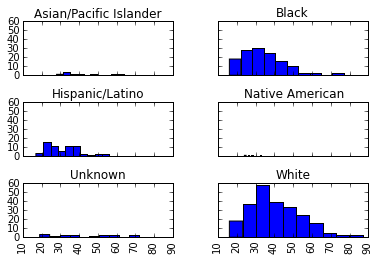

In [42]:
# 11. Show 6 histograms of ages by race
killings.age.hist(by=killings.race, sharex=True, sharey=True)

In [34]:
# 12. What is the average age of death by race?
killings.groupby('race').age.mean().sort_values(ascending=False)

race
Unknown                   43.533333
Asian/Pacific Islander    40.800000
White                     40.466102
Black                     34.044444
Hispanic/Latino           31.716418
Native American           27.750000
Name: age, dtype: float64

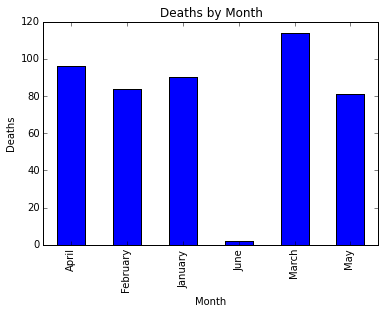

In [41]:
# 13. Show a bar chart with counts of deaths every month
killings.groupby('month').month.count().plot(kind='bar', title='Deaths by Month')
plt.ylabel('Deaths')
plt.xlabel('Month')

In [ ]:
###################
### Less Morbid ###
###################

In [130]:
majors = pd.read_csv('./data/college-majors.csv')
majors.head()

,Unnamed: 0,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
0,0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,34000,80000.0
1,1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.028636,54000,36000,80000.0
2,2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.030248,63000,40000,98000.0
3,3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.042679,46000,30000,72000.0
4,4,1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,12722,894,0.049188,62000,38500,90000.0


In [47]:
# 1. Delete the columns (employed_full_time_year_round, major_code)
majors.drop(['Employed_full_time_year_round', 'Major_code'], 1)

,Unnamed: 0,Major,Major_category,Total,Employed,Unemployed,Unemployment_rate,Median,P25th,P75th
0,0,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,2423,0.026147,50000,34000,80000.0
1,1,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,2266,0.028636,54000,36000,80000.0
2,2,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,821,0.030248,63000,40000,98000.0
3,3,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,3619,0.042679,46000,30000,72000.0
4,4,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,894,0.049188,62000,38500,90000.0
5,5,PLANT SCIENCE AND AGRONOMY,Agriculture & Natural Resources,79409,63043,2070,0.031791,50000,35000,75000.0
6,6,SOIL SCIENCE,Agriculture & Natural Resources,6586,4926,264,0.050867,63000,39400,88000.0
7,7,MISCELLANEOUS AGRICULTURE,Agriculture & Natural Resources,8549,6392,261,0.039230,52000,35000,75000.0
8,8,ENVIRONMENTAL SCIENCE,Biology & Life Science,106106,87602,4736,0.051290,52000,38000,75000.0
9,9,FORESTRY,Agriculture & Natural Resources,69447,48228,2144,0.042563,58000,40500,80000.0


In [48]:
# 2. Show the cout of missing values in each column
majors.isnull().sum()

Unnamed: 0                       0
Major_code                       0
Major                            0
Major_category                   0
Total                            0
Employed                         0
Employed_full_time_year_round    0
Unemployed                       0
Unemployment_rate                0
Median                           0
P25th                            0
P75th                            0
dtype: int64

In [60]:
# 3. What are the top 10 highest paying majors?
majors[['Major', 'Median']].sort_values(by='Median', ascending=False).head(10)

,Major,Median
59,PETROLEUM ENGINEERING,125000
154,PHARMACY PHARMACEUTICAL SCIENCES AND ADMINISTR...,106000
57,NAVAL ARCHITECTURE AND MARINE ENGINEERING,97000
55,METALLURGICAL ENGINEERING,96000
58,NUCLEAR ENGINEERING,95000
56,MINING AND MINERAL ENGINEERING,92000
97,MATHEMATICS AND COMPUTER SCIENCE,92000
48,ELECTRICAL ENGINEERING,88000
45,CHEMICAL ENGINEERING,86000
51,GEOLOGICAL AND GEOPHYSICAL ENGINEERING,85000


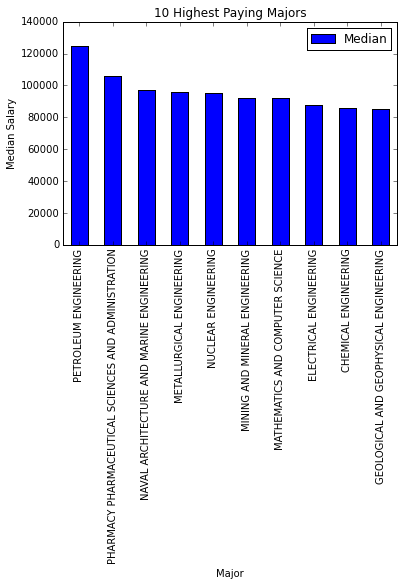

In [74]:
# 4. Plot the data from the last question in a bar chart, include proper title, and labels!
majors[['Major', 'Median']].sort_values(by='Median', ascending=False).head(10).plot(kind='bar', x='Major', title='10 Highest Paying Majors')
plt.ylabel('Median Salary')

In [70]:
# 5. What is the average median salary for each major category?
majors.groupby('Major_category').Median.mean()

Major_category
Agriculture & Natural Resources        55000.000000
Arts                                   43525.000000
Biology & Life Science                 50821.428571
Business                               60615.384615
Communications & Journalism            49500.000000
Computers & Mathematics                66272.727273
Education                              43831.250000
Engineering                            77758.620690
Health                                 56458.333333
Humanities & Liberal Arts              46080.000000
Industrial Arts & Consumer Services    52642.857143
Interdisciplinary                      43000.000000
Law & Public Policy                    52800.000000
Physical Sciences                      62400.000000
Psychology & Social Work               44555.555556
Social Science                         53222.222222
Name: Median, dtype: float64

In [73]:
# 6. Show only the top 5 paying major categories
majors.groupby('Major_category').Median.mean().head(5).sort_values(ascending=False)

Major_category
Business                           60615.384615
Agriculture & Natural Resources    55000.000000
Biology & Life Science             50821.428571
Communications & Journalism        49500.000000
Arts                               43525.000000
Name: Median, dtype: float64

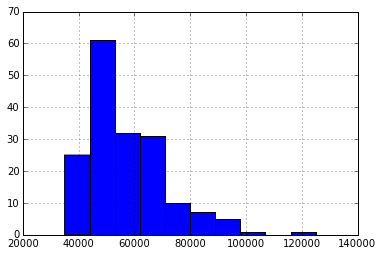

In [76]:
# 7. Plot a histogram of the distribution of median salaries
majors.Median.hist()

ValueError: x has only one data point. bins or range kwarg must be given

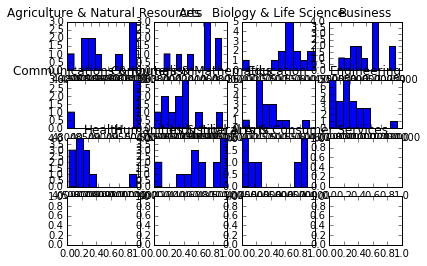

In [134]:
# 8. Plot a histogram of the distribution of median salaries by major category
majors = pd.read_csv('./data/college-majors.csv')
majors.Median.hist(by=majors.Major_category)

In [114]:
# 9. What are the top 10 most UNemployed majors?
majors[['Major', 'Unemployed']].sort_values(by='Unemployed', ascending=False).head(10)

,Major,Unemployed
161,BUSINESS MANAGEMENT AND ADMINISTRATION,147261
158,GENERAL BUSINESS,85626
114,PSYCHOLOGY,79066
159,ACCOUNTING,75379
13,COMMUNICATIONS,54390
73,ENGLISH LANGUAGE AND LITERATURE,52248
164,MARKETING AND MARKETING RESEARCH,51839
132,POLITICAL SCIENCE AND GOVERNMENT,40376
25,GENERAL EDUCATION,38742
78,BIOLOGY,36757


In [119]:
# What are the unemployment rates?
majors[['Major', 'Unemployed','Unemployment_rate']].sort_values(by='Unemployed', ascending=False).head(10)

,Major,Unemployed,Unemployment_rate
161,BUSINESS MANAGEMENT AND ADMINISTRATION,147261,0.058865
158,GENERAL BUSINESS,85626,0.051378
114,PSYCHOLOGY,79066,0.069667
159,ACCOUNTING,75379,0.053415
13,COMMUNICATIONS,54390,0.064360
73,ENGLISH LANGUAGE AND LITERATURE,52248,0.068645
164,MARKETING AND MARKETING RESEARCH,51839,0.055033
132,POLITICAL SCIENCE AND GOVERNMENT,40376,0.069374
25,GENERAL EDUCATION,38742,0.043904
78,BIOLOGY,36757,0.059301


In [124]:
# 10. What are the top 10 most UNemployed majors CATEGORIES? Use the mean for each category
# What are the unemployment rates?
majors.groupby('Major_category').Unemployed.mean().sort_values(ascending=False).head(10)

Major_category
Business                       33415.153846
Communications & Journalism    25299.750000
Social Science                 14683.333333
Arts                           13015.625000
Humanities & Liberal Arts      11942.400000
Psychology & Social Work       11578.444444
Law & Public Policy             8609.800000
Education                       7833.500000
Computers & Mathematics         7270.363636
Health                          6251.083333
Name: Unemployed, dtype: float64

In [126]:
# 11. the total and employed column refer to the people that were surveyed.
# Create a new column showing the emlpoyment rate of the people surveyed for each major
# call it "sample_employment_rate"
# Example the first row has total: 128148 and employed: 90245. it's 
# sample_employment_rate should be 90245.0 / 128148.0 = .7042
majors['sample_employment_rate'] = majors.Employed / majors.Total
majors.head()

,Unnamed: 0,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,sample_employment_rate
0,0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,34000,80000.0,0.704225
1,1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.028636,54000,36000,80000.0,0.806338
2,2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.030248,63000,40000,98000.0,0.775173
3,3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.042679,46000,30000,72000.0,0.783948
4,4,1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,12722,894,0.049188,62000,38500,90000.0,0.711738


In [128]:
# 12. Create a "sample_unemployment_rate" colun
# this column should be 1 - "sample_employment_rate"
majors['sample_unemployment_rate'] = majors.sample_employment_rate.apply(lambda x: 1 - x)
majors.head()

,Unnamed: 0,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,sample_employment_rate,sample_unemployment_rate
0,0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,34000,80000.0,0.704225,0.295775
1,1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.028636,54000,36000,80000.0,0.806338,0.193662
2,2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.030248,63000,40000,98000.0,0.775173,0.224827
3,3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.042679,46000,30000,72000.0,0.783948,0.216052
4,4,1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,12722,894,0.049188,62000,38500,90000.0,0.711738,0.288262


In [ ]:
###################
### More Tasty ###
###################

The Health Department has developed an inspection report and scoring system. 
After conducting an inspection of the facility, the Health Inspector calculates a score based on the violations observed. 
Violations can fall into:
- **high risk category**: records specific violations that directly relate to the transmission of food borne illnesses,the adulteration of food products and the contamination of food-contact surfaces.
- **moderate risk category**: records specific violations that are of a moderate risk to the public health and safety.
- **low risk category**: records violations that are low risk or have no immediate risk to the public health and safety.

In [129]:
businesses = pd.read_csv('./data/businesses_plus.csv', parse_dates=True, dtype={'phone_number': str})
businesses.head()

,business_id,name,address,city,postal_code,latitude,longitude,phone_number,TaxCode,business_certificate,application_date,owner_name,owner_address,owner_city,owner_state,owner_zip
0,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,NaN,Tiramisu LLC,33 Belden St,San Francisco,CA,94104
1,19,Nrgize Lifestyle Cafe,"1200 Van Ness Ave, 3rd Floor",San Francisco,94109,37.786848,-122.421547,NaN,H24,NaN,NaN,24 Hour Fitness Inc,"1200 Van Ness Ave, 3rd Floor",San Francisco,CA,94109
2,24,OMNI S.F. Hotel - 2nd Floor Pantry,"500 California St, 2nd Floor",San Francisco,94104,37.792888,-122.403135,NaN,H24,352312.0,NaN,OMNI San Francisco Hotel Corp,"500 California St, 2nd Floor",San Francisco,CA,94104
3,31,Norman's Ice Cream and Freezes,2801 Leavenworth St,San Francisco,94133,37.807155,-122.419004,NaN,H24,346882.0,NaN,Norman Antiforda,2801 Leavenworth St,San Francisco,CA,94133
4,45,CHARLIE'S DELI CAFE,3202 FOLSOM St,S.F.,94110,37.747114,-122.413641,NaN,H24,340024.0,10/10/2001,"HARB, CHARLES AND KRISTIN",1150 SANCHEZ,S.F.,CA,94114


In [172]:
businesses.city.value_counts()

SF                         2437
San Francisco              1869
S.F.                        975
SAN FRANCISCO               402
SF.                          35
Sf                            7
CA                            7
SO. SAN FRANCISCO             4
san Francisco                 4
SF, CA                        3
San Francisco, CA             3
sf                            2
SO.S.F.                       2
san Francisco CA              2
SAN BRUNO                     1
San Francsico                 1
OAKLAND                       1
San francisco                 1
FOSTER CITY                   1
SF, CA 94110                  1
San Franicisco                1
DALY CITY                     1
HAYWARD                       1
san francisco                 1
Oakland                       1
SF, CA 94115                  1
San Francisco, Ca             1
Sand Francisco                1
SF , CA                       1
San Franciisco                1
SF`                           1
Brentwoo

In [132]:
inspections = pd.read_csv('./data/inspections_plus.csv', parse_dates=True)
inspections.head()

,business_id,Score,date,type
0,10,NaN,20140807,Reinspection/Followup
1,10,94.0,20140729,Routine - Unscheduled
2,10,NaN,20140124,Reinspection/Followup
3,10,92.0,20140114,Routine - Unscheduled
4,19,94.0,20141110,Routine - Unscheduled


In [133]:
violations = pd.read_csv('./data/violations_plus.csv', parse_dates=True)
violations.head()

,business_id,date,ViolationTypeID,risk_category,description
0,10,20140114,103154,Low Risk,Unclean or degraded floors walls or ceilings
1,10,20140114,103119,Moderate Risk,Inadequate and inaccessible handwashing facili...
2,10,20140114,103145,Low Risk,Improper storage of equipment utensils or linens
3,10,20140729,103129,Moderate Risk,Insufficient hot water or running water
4,10,20140729,103144,Low Risk,Unapproved or unmaintained equipment or utensils


In [173]:
# 1 Combine the three dataframes into one data frame called restaurant_scores
# Hint: http://pandas.pydata.org/pandas-docs/stable/merging.html
inspection_violations = pd.merge(inspections, violations, how='left', on=['business_id', 'date'])
restaurant_scores = pd.merge(inspection_violations, businesses, how='left', on=['business_id'])
restaurant_scores.head(20)

,business_id,Score,date,type,ViolationTypeID,risk_category,description,name,address,city,...,longitude,phone_number,TaxCode,business_certificate,application_date,owner_name,owner_address,owner_city,owner_state,owner_zip
0,10,NaN,20140807,Reinspection/Followup,NaN,NaN,NaN,Tiramisu Kitchen,033 Belden Pl,San Francisco,...,-122.403816,NaN,H24,779059.0,NaN,Tiramisu LLC,33 Belden St,San Francisco,CA,94104
1,10,94.0,20140729,Routine - Unscheduled,103129.0,Moderate Risk,Insufficient hot water or running water,Tiramisu Kitchen,033 Belden Pl,San Francisco,...,-122.403816,NaN,H24,779059.0,NaN,Tiramisu LLC,33 Belden St,San Francisco,CA,94104
2,10,94.0,20140729,Routine - Unscheduled,103144.0,Low Risk,Unapproved or unmaintained equipment or utensils,Tiramisu Kitchen,033 Belden Pl,San Francisco,...,-122.403816,NaN,H24,779059.0,NaN,Tiramisu LLC,33 Belden St,San Francisco,CA,94104
3,10,NaN,20140124,Reinspection/Followup,NaN,NaN,NaN,Tiramisu Kitchen,033 Belden Pl,San Francisco,...,-122.403816,NaN,H24,779059.0,NaN,Tiramisu LLC,33 Belden St,San Francisco,CA,94104
4,10,92.0,20140114,Routine - Unscheduled,103154.0,Low Risk,Unclean or degraded floors walls or ceilings,Tiramisu Kitchen,033 Belden Pl,San Francisco,...,-122.403816,NaN,H24,779059.0,NaN,Tiramisu LLC,33 Belden St,San Francisco,CA,94104
5,10,92.0,20140114,Routine - Unscheduled,103119.0,Moderate Risk,Inadequate and inaccessible handwashing facili...,Tiramisu Kitchen,033 Belden Pl,San Francisco,...,-122.403816,NaN,H24,779059.0,NaN,Tiramisu LLC,33 Belden St,San Francisco,CA,94104
6,10,92.0,20140114,Routine - Unscheduled,103145.0,Low Risk,Improper storage of equipment utensils or linens,Tiramisu Kitchen,033 Belden Pl,San Francisco,...,-122.403816,NaN,H24,779059.0,NaN,Tiramisu LLC,33 Belden St,San Francisco,CA,94104
7,19,94.0,20141110,Routine - Unscheduled,103145.0,Low Risk,Improper storage of equipment utensils or linens,Nrgize Lifestyle Cafe,"1200 Van Ness Ave, 3rd Floor",San Francisco,...,-122.421547,NaN,H24,NaN,NaN,24 Hour Fitness Inc,"1200 Van Ness Ave, 3rd Floor",San Francisco,CA,94109
8,19,94.0,20141110,Routine - Unscheduled,103116.0,Moderate Risk,Inadequate food safety knowledge or lack of ce...,Nrgize Lifestyle Cafe,"1200 Van Ness Ave, 3rd Floor",San Francisco,...,-122.421547,NaN,H24,NaN,NaN,24 Hour Fitness Inc,"1200 Van Ness Ave, 3rd Floor",San Francisco,CA,94109
9,19,94.0,20140214,Routine - Unscheduled,103156.0,Low Risk,Permit license or inspection report not posted,Nrgize Lifestyle Cafe,"1200 Van Ness Ave, 3rd Floor",San Francisco,...,-122.421547,NaN,H24,NaN,NaN,24 Hour Fitness Inc,"1200 Van Ness Ave, 3rd Floor",San Francisco,CA,94109


In [153]:
restaurant_scores.isnull().sum()

business_id                 0
Score                   15599
date                        0
type                        0
ViolationTypeID         13486
risk_category           13498
description             13498
name                      215
address                   215
city                     9282
postal_code              1563
latitude                16016
longitude               16016
phone_number            41209
TaxCode                   215
business_certificate     6750
application_date        14977
owner_name                317
owner_address             381
owner_city                458
owner_state               466
owner_zip                 598
dtype: int64

In [158]:
# 2 Which ten business have had the most inspections?
restaurant_scores.name.value_counts().head(10)

Peet's Coffee & Tea           151
Starbucks Coffee              100
Whole Foods Market             97
Specialty's Cafe & Bakery      88
KENTUCKY FRIED CHICKEN         80
Lers Ros Thai Noodle           78
San Francisco Soup Company     74
King of Thai Noodle House      69
Cafe Bakery                    67
Yama Sushi Restaurant          66
Name: name, dtype: int64

In [177]:
# 3 Group and count the inspections by type
restaurant_scores.date.describe()

count    5.740000e+04
mean     2.014234e+07
std      9.046783e+03
min      2.013041e+07
25%      2.013121e+07
50%      2.014071e+07
75%      2.015043e+07
max      2.016122e+07
Name: date, dtype: float64

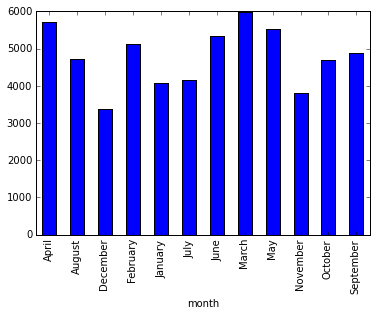

In [191]:
# 4 Create a plot that shows number of inspections per month
# Bonus for creating a heatmap
# http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.heatmap.html?highlight=heatmap
from datetime import datetime

restaurant_scores["datetime"] = restaurant_scores.date.apply(lambda x: datetime.strptime(str(x), '%Y%m%d'))
restaurant_scores["month"] = restaurant_scores.datetime.apply(lambda x: x.strftime("%B"))
restaurant_scores["month_num"] = restaurant_scores.datetime.apply(lambda x: x.month)
restaurant_scores.head()
restaurant_scores.sort_values(by='month_num').groupby('month').month.count().plot(kind='bar')

In [192]:
# 5 Which zip code contains the most high risk violations?
restaurant_scores.owner_zip.value_counts().head(1)

94110    4390
Name: owner_zip, dtype: int64

In [164]:
# 6 If inspection is prompted by a change in restaurant ownership, 
# is the inspection more likely to be categorized as higher or lower risk?
restaurant_scores[restaurant_scores.type == 'New Ownership'].risk_category.value_counts()

Low Risk         553
Moderate Risk    419
High Risk        148
Name: risk_category, dtype: int64

In [166]:
# 7 Examining the descriptions, what is the most common violation?
restaurant_scores.description.value_counts().head(1)

Unclean or degraded floors walls or ceilings    3751
Name: description, dtype: int64

In [215]:
# 8 What street has the best (safest) restaurants to dine out at?
import re
def ex_street(addy):
    if type(addy) == str:
        #print addy
        m = re.search("(\d*)\s([a-zA-z0-9 ]*(Street|St|Ave|Avenue|Blvd|Boulevard))", addy, re.IGNORECASE)
        if m and len(m.groups()) > 1:
            #print m.group(2).strip()
            return m.group(2).strip().lower()
    return "NA"

restaurant_scores['street'] = restaurant_scores.address.apply(ex_street)
restaurant_scores.groupby('street').ViolationTypeID.count().sort_values()

street
5th ave                           0
beverly st                        0
galvez ave                        0
oak grove st                      0
6th fl market st                  0
2nd fl market st                  0
underwood ave                     0
brannan st  1st                   0
43rd ave                          0
nw corner grant at geary st       0
tillman st                        0
tennessee st st                   0
sansome st 1st                    0
sacramento ave                    0
tehama st                         0
a south van ness st               0
central ave                       0
sutter st 1st                     0
c fitzgerald ave                  0
pier 39 west                      0
girard st                         0
lusk st                           0
bacon st                          0
kearny st 1st                     0
hawthorne st                      0
beroadway st                      0
mission st st                     0
athens st            

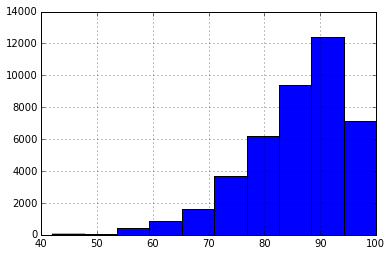

In [168]:
# 9 Create a hist of the scores with 10 bins
restaurant_scores.Score.hist(bins=10)

In [ ]:
# 8 Extra Credit:
# Use Instagram location API to find pictures taken at the lat, long of the most High Risk restaurant
# https://www.instagram.com/developer/endpoints/locations/